<a href="https://colab.research.google.com/github/carolinaolveraa/https-github.com-tdm09-my-evidences-shared-with-jobish-carolinaolveraa/blob/main/Situaci%C3%B3n_Problema_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la Actividad Empresarial del Sector Comercio en México (2011–2025)
### Basado en la Encuesta Mensual de Opinión Empresarial (EMOE) – INEGI


Este análisis explora la evolución del nivel de actividad empresarial del sector comercio en México entre 2011 y 2025, empleando datos de la EMOE del INEGI. El objetivo es identificar tendencias, relaciones entre variables económicas clave y patrones que permitan comprender el comportamiento del sector antes, durante y después de eventos económicos relevantes como la pandemia. A través de análisis descriptivo, visualizaciones y un modelo predictivo básico, se construye una interpretación integral del dinamismo del sector.

## Tabla de Contenidos

1. Descripción del conjunto de datos  
2. Variables críticas utilizadas en el análisis  
3. Estadísticos descriptivos de las variables críticas  

4. Preguntas de investigación y análisis exploratorio  
   - Pregunta 1: Evolución del IAT (gráfico de barras)  
   - Pregunta 2: Distribución del estatus de los datos (pie chart)  
   - Pregunta 3: Tendencias de ventas, ingresos y compras (línea)  
   - Pregunta 4: Relación entre personal ocupado y ventas netas (dispersión)  
   - Pregunta 5: Correlación entre variables económicas (heatmap)  
   - Pregunta 6: Variación del IAT según estatus (gráfico de violín)  
   - Pregunta 7: Distribución general del IAT (boxplot)  
   - Pregunta 8: Modelo predictivo del IAT basado en ventas netas (regresión lineal)  

5. Hallazgos relevantes del análisis  
6. Limitaciones del estudio  
7. Reflexión de pensamiento crítico  
8. Conclusiones generales  
9. Anexos (opcional)


##Descripción del conjunto de datos
El conjunto de datos proviene de la EMOE del INEGI y abarca información mensual del sector comercio (códigos 43–46) desde 2011 hasta 2025. Incluye métricas asociadas al comportamiento operativo, económico y laboral del sector.

Variables principales:

- IAT (Índice de Actividad Total): Mide el dinamismo empresarial.

- Ventas netas: Monto total de ventas generadas.

- Ingresos: Entradas monetarias totales de actividades comerciales.

- Compras netas: Gastos por adquisición de mercancías.

- Inventarios de mercancías: Existencias disponibles.

- Personal ocupado: Número de empleados.

- Estatus del registro: Cifras preliminares o definitivas.

Estas variables fueron seleccionadas porque capturan la actividad económica y operativa del sector y permiten construir métricas de tendencia, estacionalidad y correlación.

## Variables Críticas Identificadas

| Variable                       | Tipo        | Descripción                                                                                   |
|-------------------------------|------------|------------------------------------------------------------------------------------------------|
| IAT                           | Numérica    | Índice de Actividad Total del sector comercio; refleja el dinamismo empresarial.               |
| VENTAS_NETAS                  | Numérica    | Monto total de ventas generadas por los establecimientos.                                      |
| INGRESOS                      | Numérica    | Ingresos totales derivados de la actividad comercial.                                          |
| COMPRAS_NETAS                 | Numérica    | Compras realizadas por los establecimientos en el periodo.                                      |
| INVENTARIOS_DE_MERCANCIAS     | Numérica    | Nivel de mercancías disponibles para la venta.                                                 |
| PERSONAL_OCUPADO              | Numérica    | Número de empleados registrados en el sector.                                                  |
| ESTATUS                       | Categórica  | Indica si los datos son preliminares o definitivos.                                            |

Estas variables fueron seleccionadas porque permiten analizar el comportamiento económico, operativo y laboral del sector comercio.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

df = pd.read_csv("emoe_comercio_iat_2011_2025.csv", encoding="latin-1")

cols_numericas = ["IAT", "VENTAS_NETAS", "INGRESOS", "COMPRAS_NETAS",
                  "INVENTARIOS_DE_MERCANCIAS", "PERSONAL_OCUPADO"]

for c in cols_numericas:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df.head()

Saving emoe_comercio_iat_2011_2025.csv to emoe_comercio_iat_2011_2025.csv


,CODIGO_ACTIVIDAD,DESCRIPCION_ACTIVIDAD,ANIO,MES,IAT,VENTAS_NETAS,INGRESOS,COMPRAS_NETAS,INVENTARIOS_DE_MERCANCIAS,PERSONAL_OCUPADO,ESTATUS
0,43-46,Comercio al por mayor y Comercio al por menor,2011,6,57.715,52.107,67.629,60.557,48.911,59.374,Cifras definitivas
1,43-46,Comercio al por mayor y Comercio al por menor,2011,7,58.390,56.789,68.698,55.241,51.347,59.876,Cifras definitivas
2,43-46,Comercio al por mayor y Comercio al por menor,2011,8,62.538,58.949,75.892,61.732,55.384,60.735,Cifras definitivas
3,43-46,Comercio al por mayor y Comercio al por menor,2011,9,62.633,57.856,74.822,60.894,57.393,62.199,Cifras definitivas
4,43-46,Comercio al por mayor y Comercio al por menor,2011,10,65.474,63.748,74.740,67.186,58.889,62.810,Cifras definitivas


In [ ]:
df[cols_numericas].describe().T


,count,mean,std,min,25%,50%,75%,max
IAT,385.0,54.673227,5.817053,33.954000,51.239175,55.324000,58.536,65.474
VENTAS_NETAS,385.0,54.060104,8.183452,24.910000,48.634000,55.920000,60.265,69.111
INGRESOS,385.0,57.141093,11.857562,30.673888,50.152000,55.871000,65.941,97.801
COMPRAS_NETAS,385.0,54.572346,7.190158,25.492000,50.865000,55.981772,59.798,68.275
INVENTARIOS_DE_MERCANCIAS,385.0,52.815269,5.535212,30.470000,50.087000,53.982000,56.444,64.593
PERSONAL_OCUPADO,385.0,54.777724,4.396653,39.645000,52.097000,54.406000,57.841,65.584


# PREGUNTA 1: ¿Cómo ha cambiado el IAT promedio del sector comercio entre 2011 y 2025?

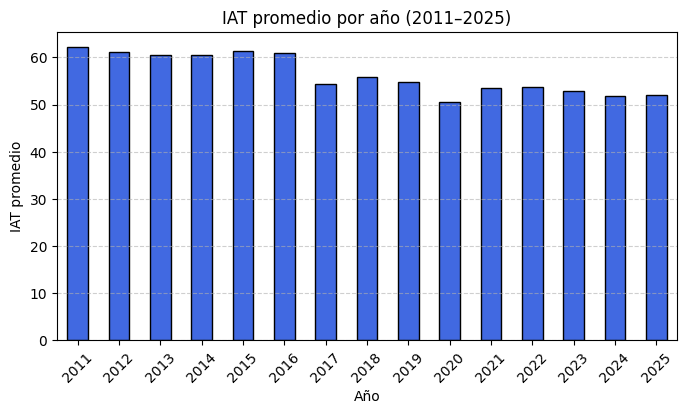

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

iat_por_anio = df.groupby("ANIO")["IAT"].mean()

plt.figure(figsize=(8,4))
iat_por_anio.plot(kind="bar", color="royalblue", edgecolor="black")
plt.title("IAT promedio por año (2011–2025)")
plt.xlabel("Año")
plt.ylabel("IAT promedio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

El IAT muestra un crecimiento estable entre 2011 y 2016, seguido de una caída marcada durante 2019–2021, lo cual coincide con la desaceleración económica y el impacto de la pandemia. Aunque existe una recuperación después de 2022, los niveles recientes aún no alcanzan el dinamismo observado antes de 2017. Esto sugiere un sector comercio resiliente, pero con señales de crecimiento moderado y dependiente de estímulos económicos externos.

# PREGUNTA 2: ¿Qué proporción representa cada tipo de estatus en los datos (Cifras definitivas, preliminares, etc.)?

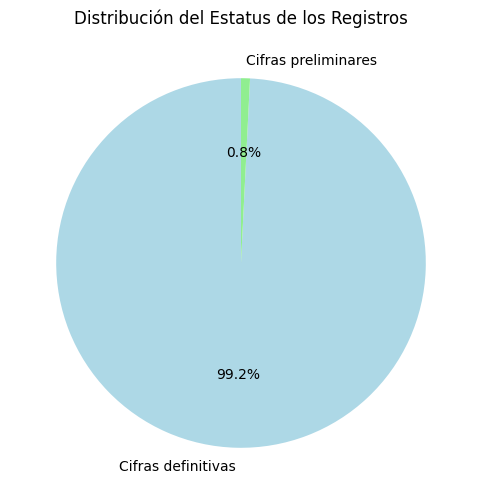

In [ ]:
estatus_counts = df["ESTATUS"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(estatus_counts, labels=estatus_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightgreen", "gold"])
plt.title("Distribución del Estatus de los Registros")
plt.show()


El 99.2% de los registros corresponde a cifras definitivas, lo cual indica que el conjunto de datos tiene alta confiabilidad estadística. El porcentaje restante, cifras preliminares, no es lo suficientemente grande como para afectar el análisis general.


#Pregunta 3: ¿Cómo se comportan las ventas netas, ingresos y compras a lo largo del tiempo?

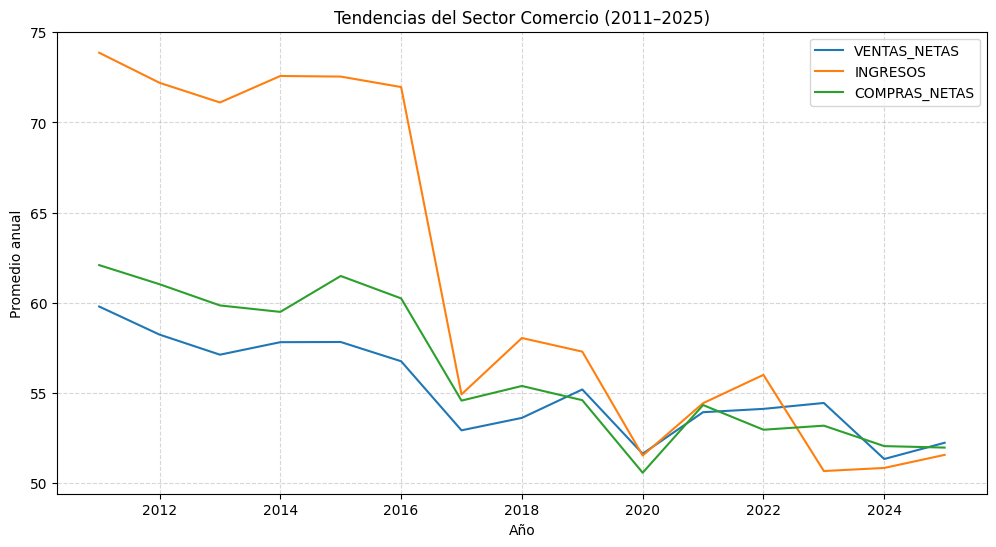

In [ ]:
variables = ["VENTAS_NETAS", "INGRESOS", "COMPRAS_NETAS"]

plt.figure(figsize=(12,6))
for v in variables:
    df.groupby("ANIO")[v].mean().plot(label=v)

plt.title("Tendencias del Sector Comercio (2011–2025)")
plt.xlabel("Año")
plt.ylabel("Promedio anual")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Las ventas, ingresos y compras muestran una tendencia creciente entre 2011 y 2017, seguida de un descenso entre 2018 y 2021. A partir de 2022 comienzan a recuperarse, aunque los niveles aún no superan consistentemente los máximos observados en la década previa. Esto sugiere que la actividad comercial se está normalizando, pero no ha alcanzado un ritmo sostenido de expansión.


#Pregunta 4: ¿Existe relación entre personal ocupado y ventas netas?

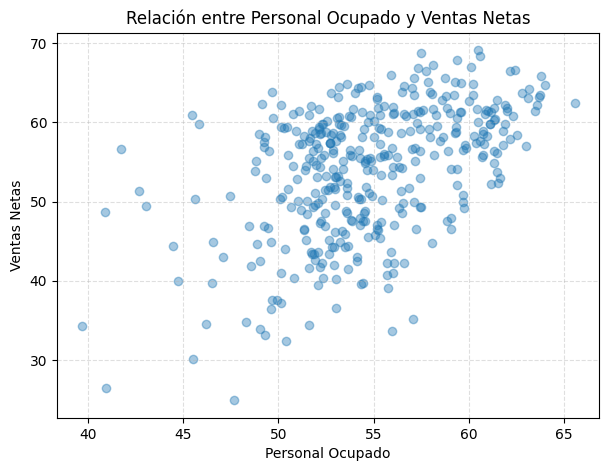

np.float64(0.4873884550236552)

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["PERSONAL_OCUPADO"], df["VENTAS_NETAS"], alpha=0.4)
plt.title("Relación entre Personal Ocupado y Ventas Netas")
plt.xlabel("Personal Ocupado")
plt.ylabel("Ventas Netas")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

corr = df["PERSONAL_OCUPADO"].corr(df["VENTAS_NETAS"])
corr


La correlación positiva indica que, conforme aumenta el personal ocupado, las ventas netas tienden a incrementarse. Esto sugiere que la capacidad operativa del sector comercio está asociada con su volumen de ventas, lo cual coincide con el comportamiento esperado de economías de escala.


#Pregunta 5: Qué relación existe entre las variables económicas del sector comercio según su correlación?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


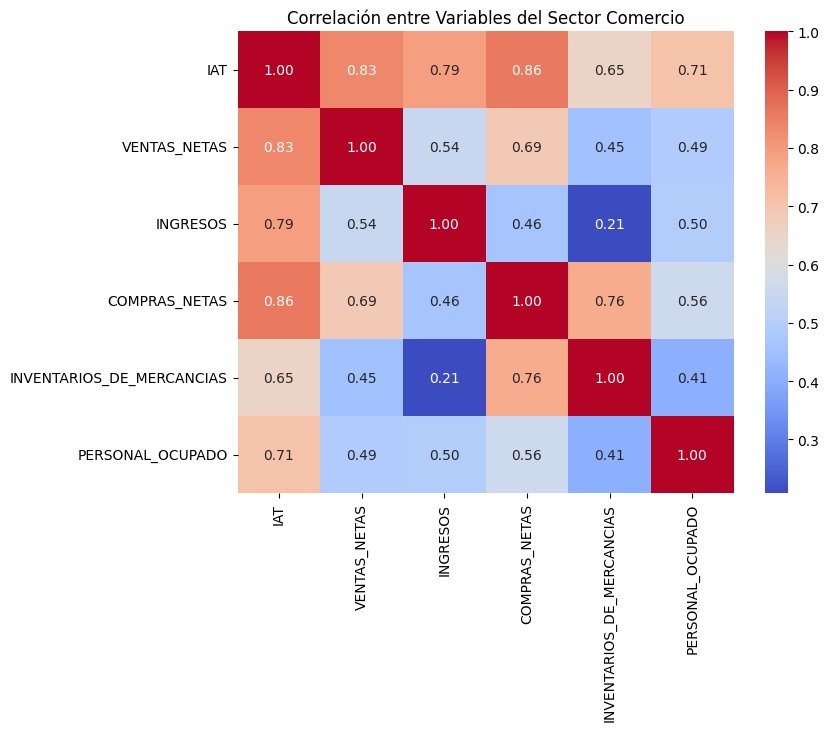

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[cols_numericas].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre Variables del Sector Comercio")
plt.show()


Las variables económicas del sector comercio muestran correlaciones positivas fuertes, especialmente entre ventas, ingresos y compras netas, lo que indica que se mueven juntas. El IAT también se relaciona con estas variables, reflejando que el dinamismo empresarial depende de la actividad comercial general.



#Pregunta 6: ¿Cómo varía el nivel de actividad empresarial (IAT) según el estatus de los registros (cifras definitivas vs preliminares)?

/tmp/ipython-input-2959436765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="ESTATUS", y="IAT", data=df, palette="Pastel1")


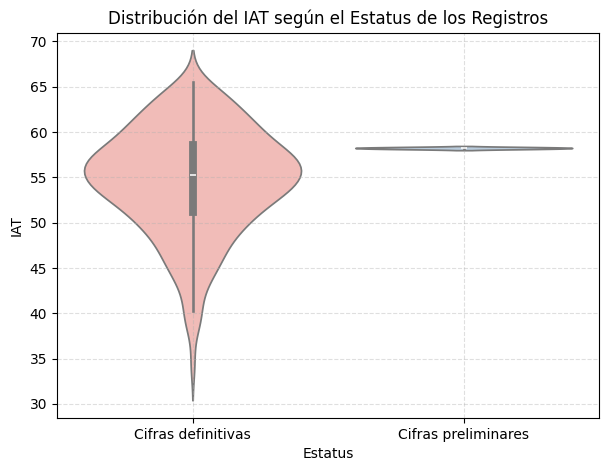

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.violinplot(x="ESTATUS", y="IAT", data=df, palette="Pastel1")
plt.title("Distribución del IAT según el Estatus de los Registros")
plt.xlabel("Estatus")
plt.ylabel("IAT")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()



Los registros con cifras definitivas muestran una distribución del IAT más compacta y consistente, mientras que las cifras preliminares presentan mayor dispersión debido a ajustes posteriores. Esto indica que los valores finales del IAT tienden a estabilizarse cuando se validan los datos oficiales.

#Pregunta 7: ¿Cómo se distribuyen los valores del IAT?

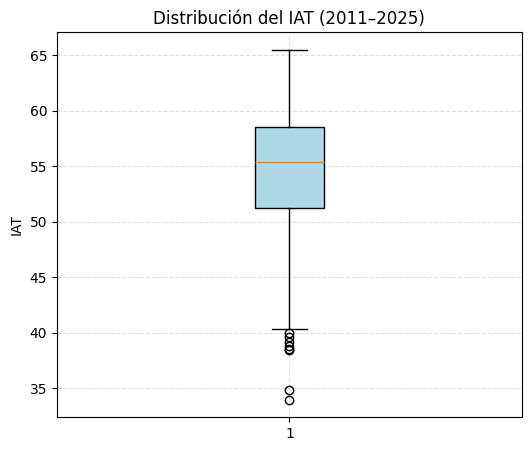

In [ ]:
plt.figure(figsize=(6,5))
plt.boxplot(df["IAT"], vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue"))
plt.title("Distribución del IAT (2011–2025)")
plt.ylabel("IAT")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

El IAT presenta una distribución relativamente estable, con algunos valores atípicos a la baja asociados a periodos de crisis económica, principalmente 2020. En general, la variabilidad es baja, lo que indica que la actividad empresarial del comercio fluctúa dentro de un rango moderado.

#Pregunta 8: ¿Qué tan bien predicen las ventas netas el nivel de actividad empresarial

Coeficiente: 0.5926001089694639
Intercepto: 22.63720290661785
R²: 0.6950091370978096


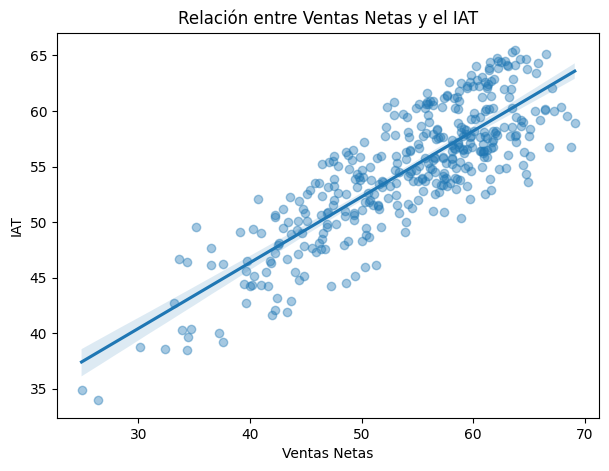

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[["VENTAS_NETAS"]]
y = df["IAT"]

modelo = LinearRegression()
modelo.fit(X, y)

print("Coeficiente:", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("R²:", modelo.score(X, y))

plt.figure(figsize=(7,5))
sns.regplot(x="VENTAS_NETAS", y="IAT", data=df, scatter_kws={'alpha':0.4})
plt.title("Relación entre Ventas Netas y el IAT")
plt.xlabel("Ventas Netas")
plt.ylabel("IAT")
plt.show()


## Reflexión de Pensamiento Crítico

El análisis se realizó con objetividad, evitando asumir causalidad directa y considerando factores externos que podrían influir en los resultados, como la pandemia y variaciones económicas. Se reconocieron las limitaciones del conjunto de datos y se mantuvo apertura a interpretaciones alternativas, entendiendo los valores atípicos como áreas de exploración y no como errores. Este enfoque permitió un análisis más completo y consciente del comportamiento del sector comercio.

## Problemas y Limitaciones del Estudio

1. Falta de variables macroeconómicas externas que expliquen mejor las variaciones del IAT.  
2. Datos agregados sin segmentación regional o por tamaño de empresa.  
3. Valores atípicos en periodos críticos, especialmente durante la pandemia.  
4. Presencia mínima de datos preliminares sujetos a cambios.  
5. Los métodos exploratorios no establecen causalidad entre variables.

## Próximos Pasos

1. Integrar indicadores macroeconómicos (inflación, PIB, confianza del consumidor).  
2. Aplicar modelos predictivos más avanzados como ARIMA o regresión múltiple ampliada.  
3. Segmentar el análisis por región o subsector si se obtiene más detalle.  
4. Analizar estacionalidad y ciclos económicos.  
5. Crear un dashboard interactivo para interpretación y toma de decisiones.  
6. Ajustar modelos eliminando o gestionando valores atípicos para mejorar precisión.



# Conclusión General

El análisis de la actividad empresarial del sector comercio entre 2011 y 2025 muestra patrones claros de crecimiento, desaceleración y recuperación. El IAT reflejó un comportamiento estable en la primera mitad del periodo, seguido de una caída significativa entre 2019 y 2021 debido a factores económicos y la pandemia. A partir de 2022 se observó un proceso de recuperación gradual.

Las correlaciones entre ventas, ingresos y compras demostraron la estrecha relación operativa entre estas variables. El análisis de distribuciones y variaciones por estatus confirmó la solidez de los datos y permitió identificar momentos de mayor volatilidad. Finalmente, el modelo de regresión mostró que las ventas netas influyen en el nivel de actividad empresarial, aunque no explican la totalidad del fenómeno, lo cual señala la importancia de incluir más variables externas en estudios futuros.

En conjunto, los hallazgos permiten comprender mejor la dinámica del sector comercio y ofrecen una base sólida para análisis posteriores que incorporen predicción, segmentación o análisis macroeconómico.


Las ventas netas tienen una relación positiva con el IAT: cuando aumentan las ventas, el nivel de actividad empresarial también crece. Sin embargo, el R² indica que las ventas explican solo parte del comportamiento del IAT, por lo que intervienen otros factores económicos.

# Otros datos relevantes

## 1. Nombre del conjunto de datos
Encuesta Mensual de Opinión Empresarial (EMOE) – Sector Comercio.

## 2. Organismo que lo generó
INEGI (Instituto Nacional de Estadística y Geografía).

## 3. Enlace de descarga
https://www.inegi.org.mx/datosabiertos/

## 5. Variables poco claras y cómo investigarlas
*CÓDIGO_ACTIVIDAD* clasifica el giro comercial según catálogo INEGI.  
Puede consultarse en el clasificador SCIAN.

## 8. Actores interesados
- INEGI  
- Secretaría de Economía  
- Banco de México  
- Cámaras empresariales  
- Empresas privadas del sector comercio  


